<a href="https://colab.research.google.com/github/teethavattcp/teethavat_port_data/blob/main/05_DemandForecasting_03_Erratic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
import time

# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=140177304dc6a9e6a6b23370f87e301998e19122fa4e73800249e971c4f1433c
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import pandasql

In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

In [ ]:
import datetime as dt
from datetime import datetime

In [ ]:
from pathlib import Path

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import statsmodels.tsa.stattools as smt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation

from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [ ]:
!pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.6 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV

#Define fn for cleaning raw data

##count_total_duplicates(df)

In [ ]:
def count_total_duplicates(df):
    # Identifying duplicate rows (excluding the first occurrence)
    duplicates = df.duplicated(keep='first')

    # Summing the number of duplicate rows
    total_duplicates = duplicates.sum()

    return total_duplicates

##check_duplication_in_df(df)

In [ ]:
def check_duplication_in_df(df):
  total_duplicates = count_total_duplicates(df)
  if total_duplicates > 0:
    print(f"There are {total_duplicates} duplicate rows in the DataFrame.")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows were dropped.")
    print("New shape of dataframe after dropping duplicate rows:",df.shape)
  elif total_duplicates == 0:
    print("No duplicate rows found.")

## format_number(x)

In [ ]:
def format_number(x):
    if isinstance(x, float):
        if x.is_integer():
            return '{:.0f}'.format(x)  # Convert to integer if it's a whole number
        else:
            return '{:.2f}'.format(x)  # Keep as float with 2 decimal places
    return x

## explore_df(df_for_eda)

In [ ]:
def explore_df(df_for_eda):
  print("#Check shape")
  print(df_for_eda.shape,"\n")

  print("#Check duplication")
  check_duplication_in_df(df_for_eda)

  print("\n#Check missing value")
  if df_for_eda.isnull().sum().sum() == 0:
    print("No missing values found.")
  else:
    print("Missing values found:", df_for_eda.isnull().sum().sum())
    print("\nNumber of missing values:\n",df_for_eda.isnull().sum())
    print("\nPercentage of missing values:\n",df_for_eda.isnull().sum()/len(df_for_eda)*100)

  print("\n#Check data type")
  print(df_for_eda.info(),"\n")

  print("\n#Check unique value")
  print(df_for_eda.nunique(),"\n")

  print("#List of column name:\n",df_for_eda.columns.tolist())

## explore_classes_in_df(df,df_col_cat)

In [ ]:
def explore_classes_in_df(df,df_col_cat):
  for col in df_col_cat:
    print ("\n-------- %s --------" % col)
    print (df[col].value_counts())

In [ ]:
def explore_distribution_in_df(df,df_col_num):
  for col in df_col_num:
    #histogram plot
    #plt.figure(figsize=(2.5, 1.25))
    print ("\n-------- %s --------" % col)

    # Create the histogram plot to calculate the max count
    hist = sns.histplot(df[col])

    # Calculate the maximum count (frequency)
    max_count = hist.patches[0].get_height()  # Initialize with the first bar's height
    for bar in hist.patches:
        if bar.get_height() > max_count:
            max_count = bar.get_height()

    # Clear the current plot to redraw with y-axis limit
    plt.clf()

    # Create the histogram plot again
    sns.histplot(df[col])

    # Set the maximum limit for the y-axis
    plt.ylim(top=1.3 * max_count)

    # Display the plot
    plt.title(f'Histogram of {col}')
    plt.show()

    #box plot
    #plt.figure(figsize=(2.5, 1.25))
    plt.clf()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## deepexploredf(df,df_col_cat, df_col_num)

In [ ]:
import matplotlib.cm as cm

In [ ]:
def deepexploredf(df,df_col_cat, df_col_num):
  print("##Explore categorical data")
  if len(df_col_cat) == 0:
    print("No categorical column found.")
  else:
    explore_classes_in_df(df,df_col_cat)

  print("\n##Explore numerical data")
  if len(df_col_num) == 0:
    print("No numerical data found.")
  else:
    print("#Check statistical summary")
    print(df[df_col_num].describe().applymap(format_number).transpose().to_markdown())
    print("#Check correlation")
    #plt.figure(figsize = (2,1.25))
    #plt.rcParams.update({'font.size': 10})
    sns.heatmap(df[df_col_num].corr(), annot =True, cmap=cm.coolwarm_r, vmin=-1, vmax=1)
    plt.show()
    #sns.pairplot(df[df_col_num])
    #plt.show()

## export_to_csv(path_of_folder,file_name,df)

In [ ]:
def export_to_csv(path_of_folder,file_name,df):
  filepath = Path(str(path_of_folder)+str(file_name)+'.csv')
  filepath.parent.mkdir(parents=True, exist_ok=True)
  df.to_csv(filepath,mode = 'w', index=False)
  print(str(file_name)+'.csv has been exported successfully.')

In [ ]:
path_folder='/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set'+'/'

## explore_ranges_of_num_field(df,df_col_num)

In [ ]:
def explore_ranges_of_num_field(df,list_col_num):
  for col in df[list_col_num]:
    count_less_than_0_butsmallamount = len(df[(df[col] < 0) & (df[col] > -0.01)]) #-0.01 < value < 0
    count_less_than_0_butlargeamount = len(df[df[col] <= -0.01]) #-0.01 =< value
    count_equal_to_0 = len(df[df[col] == 0])
    count_greater_than_0_but_smallamount = len(df[(df[col] > 0)& (df[col] < 0.01)])
    count_greater_than_0_but_largeamount = len(df[(df[col] >= 0.01)])
    print(col,':')
    print(f'Count of values << 0: {count_less_than_0_butlargeamount}')
    print(f'Count of -0.01 < values < 0: {count_less_than_0_butsmallamount}')
    print(f'Count of values = 0: {count_equal_to_0}')
    print(f'Count of 0 < values < 0.01: {count_greater_than_0_but_smallamount}')
    print(f'Count of values >> 0: {count_greater_than_0_but_largeamount}')
    print('\n')

## add_status_column(df, left_col, right_col, status_col='status')

Add a status column to the DataFrame based on the comparison of two columns from left and right DataFrames.
```
 Parameters:
    - df (pd.DataFrame): The DataFrame resulting from an outer join.
    - left_col (str): The column name from the left DataFrame.
    - right_col (str): The column name from the right DataFrame.
    - status_col (str): The name of the new status column. Default is 'status'.

 Returns:
    - pd.DataFrame: The DataFrame with the added status column.

```


In [ ]:
def add_status_column(df, left_col, right_col, status_col='status'):
    conditions = [
        (df[left_col].notna()) & (df[right_col].notna()),  # Found value in both tables
        (df[left_col].notna()) & (df[right_col].isna()),   # Found value only in the left table
        (df[left_col].isna()) & (df[right_col].notna())    # Found value only in the right table
    ]

    choices = ['Found in both', 'Found only in left', 'Found only in right']

    df[status_col] = pd.Series(np.select(conditions, choices, default=None))
    return df

## dict_k2v_v2k(input_dict):

In [ ]:
def dict_k2v_v2k(input_dict):
  output_dict = {}

  for data_type, columns in input_dict.items():
    for column in columns:
        output_dict[column] = data_type

  return output_dict

## replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace)

In [ ]:
def replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace):
  if df[col_key_name] in dict_kv_replace.keys():
    df[col_val_name] = dict_kv_replace[df[col_key_name]]
  return df

## calculate_mape(actual, forecast)

In [ ]:
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual))*100

## calculate_rmse(actual, forecast)

In [ ]:
def calculate_rmse(actual, forecast):
    return np.sqrt(np.mean((actual - forecast) ** 2))

## MAPE(Y_actual,Y_Predicted) [for RNN]

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

# Prepare datasets

## Import data

### df_fact_trans

In [ ]:
df_fact_trans = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/fact_trans_x_couponredempt.csv', delimiter=",")
df_fact_trans = df_fact_trans.rename(columns={'PRODUCT_ID_x': 'PRODUCT_ID'})
df_fact_trans = df_fact_trans[['DAY','PRODUCT_ID','QUANTITY']]
df_fact_trans

,DAY,PRODUCT_ID,QUANTITY
0,51,825123,1
1,51,831447,1
2,51,840361,1
3,51,845307,1
4,51,852014,1
...,...,...,...
2581261,708,1109947,1
2581262,708,1117514,1
2581263,708,8019186,1
2581264,708,15596705,1


### df_product_master

In [ ]:
df_product_master = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/dim_product_master.csv', delimiter=",")
df_product_master = df_product_master[['PRODUCT_ID','demand_pattern']]
df_product_master

,PRODUCT_ID,demand_pattern
0,25671,Lumpy
1,26081,Smooth
2,26093,Smooth
3,26190,Smooth
4,26355,Smooth
...,...,...
92010,18293142,Smooth
92011,18293439,Smooth
92012,18293696,Smooth
92013,18294080,Smooth


### df_date

In [ ]:
df_date = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/00_dim_date_withforecast.csv', delimiter=",")
#df_date['TRANS_date'] = pd.to_datetime(df_date['TRANS_date'], format='%d %m %Y')
df_date = df_date[['DAY_ID','TRANS_date']]
df_date

,DAY_ID,TRANS_date
0,1,2001-01-01
1,2,2001-01-02
2,3,2001-01-03
3,4,2001-01-04
4,5,2001-01-05
...,...,...
815,816,2003-03-27
816,817,2003-03-28
817,818,2003-03-29
818,819,2003-03-30


Tuning model period: DAY 1-699 [699]

Forecasting period: DAY 700-820 [121]

In [ ]:
explore_classes_in_df(df_product_master,['demand_pattern'])


-------- demand_pattern --------
demand_pattern
Intermittent    54232
Smooth          33939
Lumpy            3741
Erratic           103
Name: count, dtype: int64


## Seperate imported data by demand pattern = 'Erratic'

In [ ]:
list_productid_Erratic = list(df_product_master[df_product_master['demand_pattern'] == 'Erratic']['PRODUCT_ID'])
print(list_productid_Erratic)

[844165, 844179, 847270, 847982, 854852, 857849, 862349, 866211, 868764, 871756, 878996, 882441, 883932, 893018, 899624, 906956, 907014, 908531, 908846, 909894, 910032, 913785, 914190, 916122, 923746, 924713, 927191, 929668, 931314, 938700, 953476, 962568, 965766, 979707, 981760, 983584, 986947, 987562, 989101, 990156, 994928, 995242, 995965, 999183, 1003188, 1003600, 1004906, 1006184, 1006675, 1013321, 1015247, 1022003, 1022254, 1024306, 1028816, 1033142, 1039502, 1044078, 1050229, 1053690, 1055646, 1058997, 1062966, 1068719, 1071939, 1076056, 1076723, 1077555, 1080414, 1092026, 1096036, 1098066, 1101173, 1120741, 1123792, 1127831, 1133018, 1136257, 5568378, 5569230, 5569327, 5569471, 5591473, 5591604, 6034857, 8090521, 8090537, 8358940, 9301235, 9419779, 12810393, 13039424, 13134167, 13189778, 13190169, 13769186, 13776199, 13841744, 15742059, 15927138, 16057508, 17902810, 18203921]


### df_fact_trans_Erratic

In [ ]:
df_fact_trans_Erratic = df_fact_trans[df_fact_trans['PRODUCT_ID'].isin(list_productid_Erratic)]
df_fact_trans_Erratic

,DAY,PRODUCT_ID,QUANTITY
45,88,995242,1
47,88,1033142,1
66,94,995242,2
83,101,995242,1
98,108,995242,1
...,...,...,...
2581177,695,844179,1
2581185,695,995242,1
2581189,695,1058997,1
2581226,704,1077555,1


## Aggregate data

###df_qty_by_day

Aggregating total quantities by day helps to capture the overall demand trend and seasonal effects.

In [ ]:
df_qty_by_day = df_fact_trans_Erratic.groupby('DAY')['QUANTITY'].sum().reset_index()
df_qty_by_day

,DAY,QUANTITY
0,1,21
1,2,13
2,3,63
3,4,71
4,5,29
...,...,...
704,707,334
705,708,303
706,709,384
707,710,374


In [ ]:
#Filter only data < Dec [DAY <700]
df_qty_by_day = df_qty_by_day[df_qty_by_day['DAY'] < 700]
df_qty_by_day

,DAY,QUANTITY
0,1,21
1,2,13
2,3,63
3,4,71
4,5,29
...,...,...
692,695,263
693,696,339
694,697,541
695,698,500


####df_qty_by_date

In [ ]:
#Join DAY with date field
df_qty_by_date = df_qty_by_day.merge(df_date[df_date['DAY_ID']<700], left_on='DAY', right_on ='DAY_ID', how='outer')
df_qty_by_date['QUANTITY'] = df_qty_by_date['QUANTITY'].fillna(0.0001)
df_qty_by_date = df_qty_by_date[['DAY_ID','TRANS_date','QUANTITY']]
df_qty_by_date = df_qty_by_date.sort_values(by='DAY_ID').reset_index(drop=True)
df_qty_by_date = df_qty_by_date.set_index('TRANS_date')
df_qty_by_date

,DAY_ID,QUANTITY
TRANS_date,,
2001-01-01,1,21.0
2001-01-02,2,13.0
2001-01-03,3,63.0
2001-01-04,4,71.0
2001-01-05,5,29.0
...,...,...
2002-11-26,695,263.0
2002-11-27,696,339.0
2002-11-28,697,541.0


### df_qty_by_product
Aggregating quantities by product and computing the percentage of total quantity helps in understanding the relative demand share of each product.

In [ ]:
df_qty_by_product = df_fact_trans_Erratic.groupby('PRODUCT_ID')['QUANTITY'].sum().reset_index()
df_qty_by_product['Percent_product_share'] = df_qty_by_product['QUANTITY'] / df_qty_by_product['QUANTITY'].sum()
df_qty_by_product

,PRODUCT_ID,QUANTITY,Percent_product_share
0,844165,5145,0.016699
1,844179,5435,0.017640
2,847270,3493,0.011337
3,847982,2937,0.009532
4,854852,4095,0.013291
...,...,...,...
98,15742059,8,0.000026
99,15927138,4,0.000013
100,16057508,4,0.000013
101,17902810,4,0.000013


In [ ]:
df_qty_by_product[['QUANTITY','Percent_product_share']].describe()

,QUANTITY,Percent_product_share
count,103.000000,103.000000
mean,2991.320388,0.009709
std,3024.223178,0.009816
min,4.000000,0.000013
25%,1113.500000,0.003614
50%,2619.000000,0.008500
75%,3931.000000,0.012759
max,21758.000000,0.070619


In [ ]:
df_qty_by_product['Percent_product_share'].sum()

1.0

# EDA Timeseries component

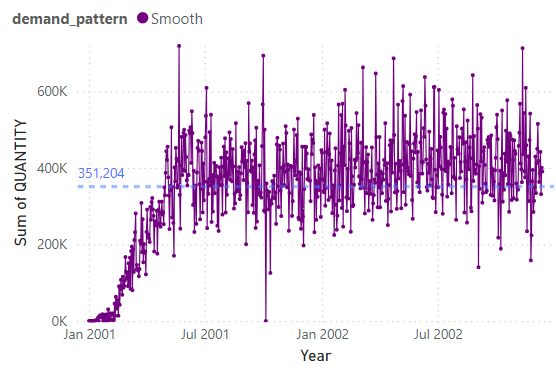

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df_qty_by_date['QUANTITY'], model='additive', period=30)

In [ ]:
# Extract decomposed components
df_qty_by_date['trend'] = decomposition.trend
df_qty_by_date['seasonal'] = decomposition.seasonal
df_qty_by_date['residual'] = decomposition.resid

In [ ]:
# Interpolate to handle NaNs in decomposed components
df_qty_by_date['trend'] = df_qty_by_date['trend'].fillna(0.1)
df_qty_by_date['seasonal'] = df_qty_by_date['seasonal'].fillna(0.1)
df_qty_by_date['residual'] = df_qty_by_date['residual'].fillna(0.1)

##Result

In [ ]:
df_qty_by_date

,DAY_ID,QUANTITY,trend,seasonal,residual
TRANS_date,,,,,
2001-01-01,1,21.0,0.1,-23.947036,0.1
2001-01-02,2,13.0,0.1,6.260540,0.1
2001-01-03,3,63.0,0.1,5.494631,0.1
2001-01-04,4,71.0,0.1,-18.485672,0.1
2001-01-05,5,29.0,0.1,28.279479,0.1
...,...,...,...,...,...
2002-11-26,695,263.0,0.1,28.279479,0.1
2002-11-27,696,339.0,0.1,16.684782,0.1
2002-11-28,697,541.0,0.1,-36.906127,0.1


In [ ]:
df_qty_by_date.describe()

,DAY_ID,QUANTITY,trend,seasonal,residual
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,350.000000,433.449213,421.186338,-0.124549,0.032632
std,201.928205,168.156372,134.794275,31.033483,111.225570
min,1.000000,0.000100,0.100000,-60.490213,-449.465751
25%,175.500000,334.500000,409.433333,-18.485672,-77.405764
50%,350.000000,431.000000,462.416667,-3.950066,-6.111297
75%,524.500000,540.000000,504.108333,18.724012,58.490709
max,699.000000,935.000000,573.783333,72.650823,391.053096


In [ ]:
# Create a figure
fig = go.Figure()

# Add the trend line
fig.add_trace(go.Scatter(x=df_qty_by_date.index, y=df_qty_by_date['trend'], mode='lines', name='Trend'))

# Update the layout
fig.update_layout(
    title='Plot of trend time series component',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [ ]:
# Create a figure
fig = go.Figure()

# Add the trend line
fig.add_trace(go.Scatter(x=df_qty_by_date.index, y=df_qty_by_date['seasonal'], mode='lines', name='Trend'))

# Update the layout
fig.update_layout(
    title='Plot of seasonal component',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [ ]:
# Create a figure
fig = go.Figure()

# Add the trend line
fig.add_trace(go.Scatter(x=df_qty_by_date.index, y=df_qty_by_date['residual'], mode='lines', name='Trend'))

# Update the layout
fig.update_layout(
    title='Plot of residual component',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [ ]:
# Perform ADF test on the residuals
adf_result = smt.adfuller(df_qty_by_date['QUANTITY'])
# Display ADF test results
print('ADF Statistic (Residuals):', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Decision based on p-value
if adf_result[1] <= 0.05:
    print("The residual component is stationary (reject null hypothesis).")
else:
    print("The residual component is non-stationary (fail to reject null hypothesis).")

ADF Statistic (Residuals): -3.3630285412942675
p-value: 0.012285677262266398
Critical Values:
   1%: -3.439946506895534
   5%: -2.8657747597081404
   10%: -2.5690251267911495
The residual component is stationary (reject null hypothesis).


From time series components, the time series patterns are trend, seasonality and stationary.

# Model Training

In [ ]:
training_ratio = 0.8

## Naive Method

In [ ]:
# Split data into training and testing sets
train_size = int(len(df_qty_by_date) * training_ratio)  # 80% training data
train, test = df_qty_by_date[['DAY_ID','QUANTITY']].iloc[:train_size], df_qty_by_date[['DAY_ID','QUANTITY']].iloc[train_size:]

In [ ]:
train

,DAY_ID,QUANTITY
TRANS_date,,
2001-01-01,1,21.0
2001-01-02,2,13.0
2001-01-03,3,63.0
2001-01-04,4,71.0
2001-01-05,5,29.0
...,...,...
2002-07-09,555,287.0
2002-07-10,556,365.0
2002-07-11,557,346.0


In [ ]:
# Naive Forecasting: Use the last observation from the training set
last_quantity_train = train['QUANTITY'].iloc[-1]

In [ ]:
# Forecast for the test set
test_forecast = pd.DataFrame({
    'DAY_ID': test['DAY_ID'],
    'FORECAST_QUANTITY': last_quantity_train,
    'ACTUAL_QUANTITY': test['QUANTITY']
})

### Evaluate model accuracy

Because there is an actual quantity as 0, then normalize RMSE (nRMSE) is used to evaluate model accuracy

In [ ]:
mean_qty_naive = test_forecast['FORECAST_QUANTITY'].mean()
mean_qty_naive

453.0

In [ ]:
rmse_naive = calculate_rmse(test_forecast['ACTUAL_QUANTITY'], test_forecast['FORECAST_QUANTITY'])
rmse_naive

151.9036092254373

In [ ]:
print(f'nRMSE: {rmse_naive/mean_qty_naive}')

nRMSE: 0.33532805568529206


##Prophet

The column renaming is required because Prophet expects the input DataFrame to have specific column names:

- ds (datestamp): This column represents the date or time of the observation. Prophet requires the time series to have a ds column where the dates are stored.

- y (value): This column contains the target variable (i.e., the values you want to forecast). Prophet expects the target variable to be in a column named y.

In [ ]:
df_qty_by_date

,DAY_ID,QUANTITY,trend,seasonal,residual
TRANS_date,,,,,
2001-01-01,1,21.0,0.1,-23.947036,0.1
2001-01-02,2,13.0,0.1,6.260540,0.1
2001-01-03,3,63.0,0.1,5.494631,0.1
2001-01-04,4,71.0,0.1,-18.485672,0.1
2001-01-05,5,29.0,0.1,28.279479,0.1
...,...,...,...,...,...
2002-11-26,695,263.0,0.1,28.279479,0.1
2002-11-27,696,339.0,0.1,16.684782,0.1
2002-11-28,697,541.0,0.1,-36.906127,0.1


In [ ]:
df_data = df_qty_by_date.reset_index().copy()
df_data = df_data[['TRANS_date','QUANTITY']]
df_data.rename(columns={'TRANS_date': 'ds', 'QUANTITY': 'y'}, inplace=True)
df_data

,ds,y
0,2001-01-01,21.0
1,2001-01-02,13.0
2,2001-01-03,63.0
3,2001-01-04,71.0
4,2001-01-05,29.0
...,...,...
694,2002-11-26,263.0
695,2002-11-27,339.0
696,2002-11-28,541.0
697,2002-11-29,500.0


In [ ]:
# Train-Test Split at 80%
train_size = int(len(df_data) * 0.8)
train_df = df_data.iloc[:train_size]
test_df = df_data.iloc[train_size:]

In [ ]:
# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxc1otzl/6x4vivxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxc1otzl/5j8xkl2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67711', 'data', 'file=/tmp/tmphxc1otzl/6x4vivxt.json', 'init=/tmp/tmphxc1otzl/5j8xkl2m.json', 'output', 'file=/tmp/tmphxc1otzl/prophet_model9wwdeuwx/prophet_model-20240819093119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:31:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:31:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make predictions on the test set
future_test = model.make_future_dataframe(periods=len(test_df), freq='D')
forecast_test = model.predict(future_test.iloc[:len(test_df)])

In [ ]:
# Extract predictions for the test set
predictions_test = forecast_test['yhat'].values

### Evaluate model performance

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df['y'], predictions_test))
mean_actual_test = test_df['y'].mean()
normalized_rmse = rmse / mean_actual_test
print(f'Normalized RMSE: {normalized_rmse}')

Normalized RMSE: 0.5580074998977801


## XGB Regressor

In [ ]:
df_data_xgb = df_qty_by_date.reset_index().copy()
df_data_xgb = df_data_xgb[['TRANS_date','DAY_ID','QUANTITY']]
# Convert TRANS_date to datetime
df_data_xgb['TRANS_date'] = pd.to_datetime(df_data_xgb['TRANS_date'])
# Create additional features
df_data_xgb['year'] = df_data_xgb['TRANS_date'].dt.year
df_data_xgb['month'] = df_data_xgb['TRANS_date'].dt.month
df_data_xgb['day_of_week'] = df_data_xgb['TRANS_date'].dt.dayofweek
df_data_xgb['day_of_year'] = df_data_xgb['TRANS_date'].dt.dayofyear
df_data_xgb

,TRANS_date,DAY_ID,QUANTITY,year,month,day_of_week,day_of_year
0,2001-01-01,1,21.0,2001,1,0,1
1,2001-01-02,2,13.0,2001,1,1,2
2,2001-01-03,3,63.0,2001,1,2,3
3,2001-01-04,4,71.0,2001,1,3,4
4,2001-01-05,5,29.0,2001,1,4,5
...,...,...,...,...,...,...,...
694,2002-11-26,695,263.0,2002,11,1,330
695,2002-11-27,696,339.0,2002,11,2,331
696,2002-11-28,697,541.0,2002,11,3,332
697,2002-11-29,698,500.0,2002,11,4,333


In [ ]:
# Features and Target
X_xgb = df_data_xgb[['DAY_ID', 'year', 'month', 'day_of_week', 'day_of_year']]
y_xgb = df_data_xgb['QUANTITY']

In [ ]:
# Train-test split (0.8)
split_index = int(0.8 * len(df_data_xgb))
X_train_xgb, X_test_xgb = X_xgb [:split_index], X_xgb [split_index:]
y_train_xgb, y_test_xgb = y_xgb [:split_index], y_xgb [split_index:]

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize XGBRegressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_xgb, y_train_xgb)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
# Train the model with best parameters
model_xgb_best = grid_search.best_estimator_

y_pred_xgb = model_xgb_best.predict(X_test_xgb)

### Evaluate model performance

In [ ]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
normalized_rmse_xgb = rmse_xgb / y_test_xgb.mean()
print(f"Normalized RMSE: {normalized_rmse_xgb }")

Normalized RMSE: 0.2854629360806005


## AutoARIMA

AutoARIMA is a function that automates the process of fitting an ARIMA or SARIMA model by automatically selecting the best parameters (p, d, q) based on the given time series data. The goal is to minimize the error metric (such as AIC or BIC) to choose the best model without requiring manual intervention, saving time and effort from traditional ARIMA or SARIMA, especially for complex datasets.

Key Features:
- Automatic Parameter Selection: Automatically selects the optimal values for p (AR order), d (differencing order), and q (MA order).
- Automates Stationarity and Seasonality Checks: It automatically performs differencing if needed to make the time series stationary, and tests for seasonality, sometimes leading to SARIMA-like models.
- Performance Metrics: Uses criteria like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to select the model with the best fit.
- Built-in Cross-Validation: Some implementations support cross-validation, ensuring the model generalizes well.

In [ ]:
df_data_arima = df_data.copy()
df_data_arima.set_index('ds', inplace=True)
df_data_arima

,y
ds,
2001-01-01,21.0
2001-01-02,13.0
2001-01-03,63.0
2001-01-04,71.0
2001-01-05,29.0
...,...
2002-11-26,263.0
2002-11-27,339.0
2002-11-28,541.0


In [ ]:
# Train-Test Split at 80%
train_size_ARIMA = int(len(df_data_arima) * 0.8)
train_df_ARIMA = df_data_arima.iloc[:train_size]
test_df_ARIMA = df_data_arima.iloc[train_size:]

In [ ]:
# Fit the AutoARIMA model
model_ARIMA = auto_arima(train_df_ARIMA['y'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6791.979, Time=7.92 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6943.760, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6923.819, Time=0.64 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6901.098, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6941.783, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=6791.720, Time=2.86 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=6797.264, Time=0.89 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=6787.473, Time=11.64 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=6784.216, Time=10.39 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=21.89 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=6782.787, Time=13.91 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=6780.920, Time=8.95 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=6793.790, Time=7.24 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=6782.740, Time=4.16 sec
 ARIMA(2,1,1)(2,0,0)

Best Model based on the lowest AIC value.: The ARIMA(1,1,2)(0,0,0)[12]
- AR Order (p): 1
- Differencing Order (d): 1
- MA Order (q): 2
- Seasonal AR Order (P): 0
- Seasonal Differencing Order (D): 0
- Seasonal MA Order (Q): 0
- Seasonality: 12 periods (monthly data with yearly seasonality)

In [ ]:
len(test_df_ARIMA)

140

In [ ]:
# Forecast on the test set
n_test_periods = len(test_df_ARIMA)
forecast = model_ARIMA.predict(n_test_periods)

### Evaluate model performance

In [ ]:
rmse_ARIMA = np.sqrt(mean_squared_error(test_df_ARIMA['y'], forecast))
mean_actual_test_ARIMA = test_df_ARIMA['y'].mean()
normalized_rmse_ARIMA = rmse_ARIMA / mean_actual_test_ARIMA
print(f'Normalized RMSE: {normalized_rmse_ARIMA}')

Normalized RMSE: 0.2726315569786377


# Forecast quantity

### Forecast future values from 2002-12-01 to 2003-03-31

In [ ]:
df_qty_by_date

,DAY_ID,QUANTITY,trend,seasonal,residual
TRANS_date,,,,,
2001-01-01,1,21.0,0.1,-23.947036,0.1
2001-01-02,2,13.0,0.1,6.260540,0.1
2001-01-03,3,63.0,0.1,5.494631,0.1
2001-01-04,4,71.0,0.1,-18.485672,0.1
2001-01-05,5,29.0,0.1,28.279479,0.1
...,...,...,...,...,...
2002-11-26,695,263.0,0.1,28.279479,0.1
2002-11-27,696,339.0,0.1,16.684782,0.1
2002-11-28,697,541.0,0.1,-36.906127,0.1


In [ ]:
# Forecast future values from 2002-12-01 to 2003-03-31
future_periods = pd.date_range(start='2002-12-01', end='2003-03-31', freq='D')
future_forecast = model_ARIMA.predict(n_periods=len(future_periods))  # Forecast future periods

# Create DataFrame for future forecast
forecast_df = pd.DataFrame({
    'TRANS_date': future_periods,
    'QUANTITY_total': future_forecast
})
forecast_df = forecast_df.reset_index().drop('index', axis=1)
forecast_df['DAY_ID'] = range(700, 700 + len(forecast_df))
forecast_df = forecast_df[['TRANS_date','DAY_ID','QUANTITY_total']]
forecast_df

,TRANS_date,DAY_ID,QUANTITY_total
0,2002-12-01,700,389.369383
1,2002-12-02,701,351.767694
2,2002-12-03,702,355.712972
3,2002-12-04,703,429.779085
4,2002-12-05,704,536.694640
...,...,...,...
116,2003-03-27,816,550.794860
117,2003-03-28,817,576.494933
118,2003-03-29,818,539.748678
119,2003-03-30,819,468.571059


## Disagregate forecast qty by product_id

In [ ]:
list_of_day = list(forecast_df['DAY_ID'])

In [ ]:
filtered_df = forecast_df[forecast_df['DAY_ID'] == 700].copy()
merged_df = pd.merge(filtered_df, df_qty_by_product[['PRODUCT_ID','Percent_product_share']], how='cross')
merged_df['QUANTITY'] = merged_df['QUANTITY_total'] * merged_df['Percent_product_share']
merged_df['QUANTITY'] = merged_df['QUANTITY'].astype(int)
merged_df = merged_df[merged_df['QUANTITY']>0]
merged_df = merged_df[['DAY_ID','PRODUCT_ID','QUANTITY']]
merged_df

,DAY_ID,PRODUCT_ID,QUANTITY
0,700,844165,6
1,700,844179,6
2,700,847270,4
3,700,847982,3
4,700,854852,5
...,...,...,...
81,700,5569471,5
84,700,6034857,3
85,700,8090521,4
86,700,8090537,4


In [ ]:
df_forecast_qty = pd.DataFrame()
for day in list_of_day:
  filtered_df = forecast_df[forecast_df['DAY_ID'] == day].copy()
  merged_df = pd.merge(filtered_df, df_qty_by_product[['PRODUCT_ID','Percent_product_share']], how='cross')
  merged_df['QUANTITY'] = merged_df['QUANTITY_total'] * merged_df['Percent_product_share']
  merged_df['QUANTITY'] = merged_df['QUANTITY'].astype(int)
  merged_df = merged_df[merged_df['QUANTITY']>0]
  merged_df = merged_df[['DAY_ID','PRODUCT_ID','QUANTITY']]
  df_forecast_qty = pd.concat([df_forecast_qty, merged_df], axis=0)
df_forecast_qty

,DAY_ID,PRODUCT_ID,QUANTITY
0,700,844165,6
1,700,844179,6
2,700,847270,4
3,700,847982,3
4,700,854852,5
...,...,...,...
81,820,5569471,5
84,820,6034857,3
85,820,8090521,5
86,820,8090537,4


In [ ]:
export_to_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/05_DemandForecasting/','Forecast_qty_03_Erratic', df_forecast_qty )

Forecast_qty_03_Erratic.csv has been exported successfully.
